In [ ]:
# Load data
import pandas as pd
import numpy as np

df_ratings = pd.read_csv('../data/Airline_review.csv',
    usecols = ['Airline Name','Review Date', 'Type Of Traveller', 'Overall_Rating','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Recommended',],
               parse_dates = ['Review Date'])
df_ratings.head()

,Airline Name,Overall_Rating,Review Date,Type Of Traveller,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,2019-11-11,Solo Leisure,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,2019-06-25,Solo Leisure,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,2019-06-25,Solo Leisure,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,2019-09-28,Solo Leisure,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,2019-09-24,Couple Leisure,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
# Check missing values
df_ratings.isnull().sum()

Airline Name                  0
Overall_Rating                0
Review Date                   0
Type Of Traveller          3738
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

In [ ]:
# Replace the missing values with the mean values
df_ratings = df_ratings.fillna(df_ratings.mean())

# Remove rows where 'Overall_Rating' is 'n'
df_ratings = df_ratings[df_ratings['Overall_Rating'] != 'n']

# Change the data type of 'Overall_Rating' to float
df_ratings['Overall_Rating'] = df_ratings['Overall_Rating'].astype(float)

<ipython-input-3-d09531c1a6da>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_ratings = df_ratings.fillna(df_ratings.mean())
<ipython-input-3-d09531c1a6da>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ratings = df_ratings.fillna(df_ratings.mean())


Summary for Overall Rating:
count    22329.000000
mean         3.144341
std          2.879443
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max          9.000000
Name: Overall_Rating, dtype: float64


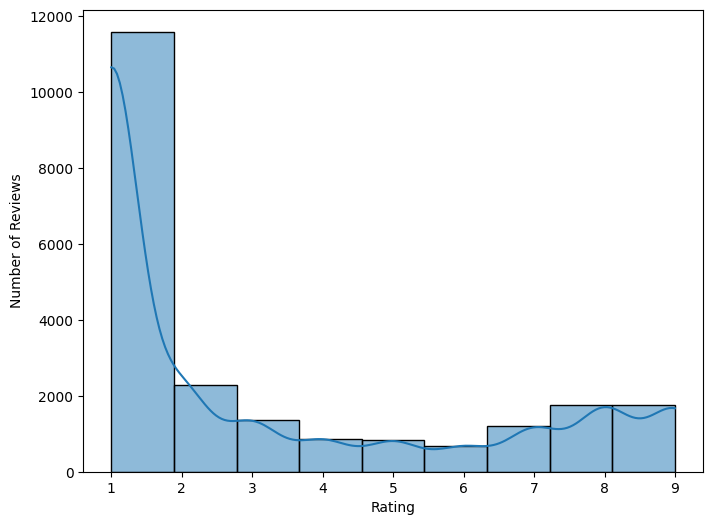

In [ ]:
# Create a histogram for the distribution of overall rating
import matplotlib.pyplot as plt
import seaborn as sns

print("Summary for Overall Rating:")
print(df_ratings['Overall_Rating'].describe())

df_ratings = df_ratings.sort_values(by = 'Overall_Rating')

plt.figure(figsize = (8, 6))
sns.histplot(df_ratings['Overall_Rating'], bins = 9, kde=True)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

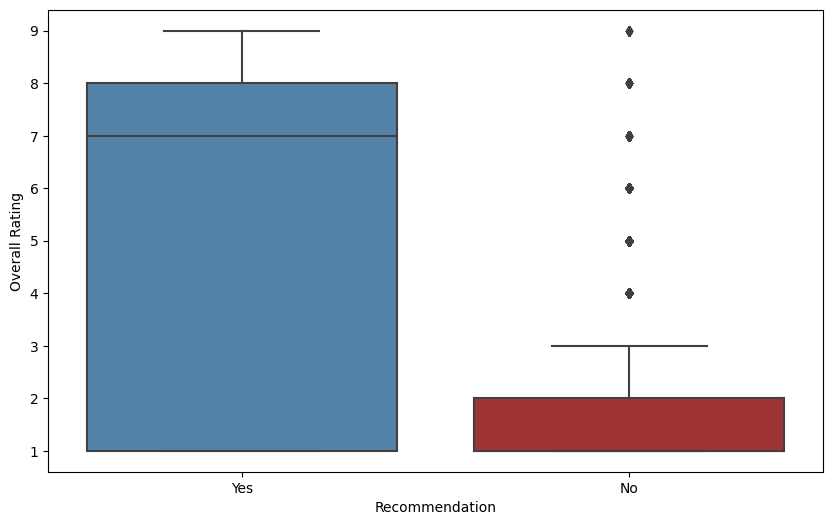

In [ ]:
palette_1 = {'yes': 'steelblue', 'no': 'firebrick'}

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x = 'Recommended', y = 'Overall_Rating', data = df_ratings, palette = palette_1, order = ['yes', 'no'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Yes', 'No'])

plt.xlabel('Recommendation')
plt.ylabel('Overall Rating')

plt.show()

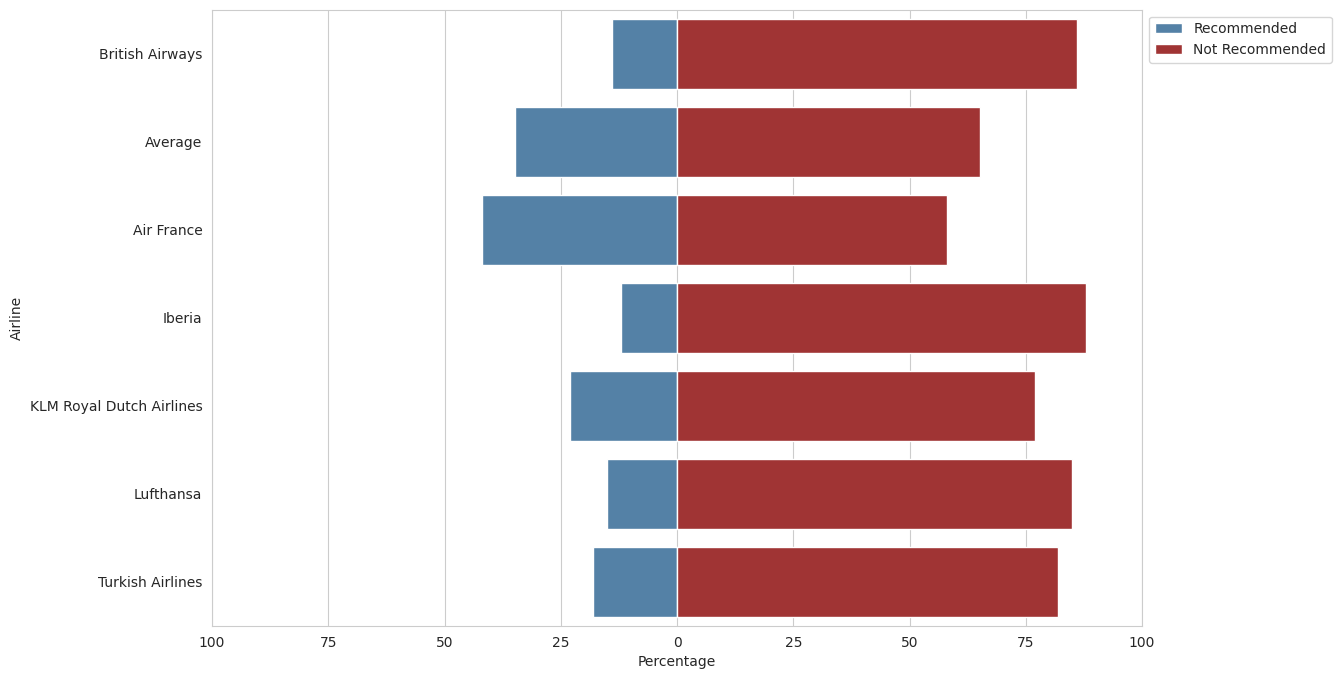

In [ ]:
order_1 = ['British Airways', 'Average', 'Air France', 'Iberia', 'KLM Royal Dutch Airlines', 'Lufthansa', 'Turkish Airlines']

competitor_df = df_ratings[df_ratings['Airline Name'].isin(order_1)]

pct_rec = competitor_df.groupby('Airline Name')['Recommended'].value_counts(normalize = True).unstack(fill_value = 0) * 100

avg_pct_rec = df_ratings['Recommended'].value_counts(normalize=True).get('yes', 0) * 100
avg_pct_not_rec = 100 - avg_pct_rec

pct_rec.loc['Average'] = [avg_pct_not_rec, avg_pct_rec]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x = -pct_rec['yes'], y = pct_rec.index, color = 'steelblue', label = 'Recommended', order = order_1)
sns.barplot(x = pct_rec['no'], y = pct_rec.index, color = 'firebrick', label = 'Not Recommended', order = order_1)

plt.xlabel('Percentage')
plt.ylabel('Airline')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(-100, 100)
plt.xticks([-100, -75, -50, -25, 0, 25, 50, 75, 100], [100, 75, 50, 25, 0, 25, 50, 75, 100])
plt.show()

[[2775  127]
 [ 136 1428]]
              precision    recall  f1-score   support

          no       0.95      0.96      0.95      2902
         yes       0.92      0.91      0.92      1564

    accuracy                           0.94      4466
   macro avg       0.94      0.93      0.94      4466
weighted avg       0.94      0.94      0.94      4466

                  Feature  Coefficient
4  Inflight Entertainment    -0.193812
5     Wifi & Connectivity     0.150199
2        Food & Beverages     0.284879
0            Seat Comfort     0.311985
1     Cabin Staff Service     0.344744
3          Ground Service     0.645760
6         Value For Money     1.524363


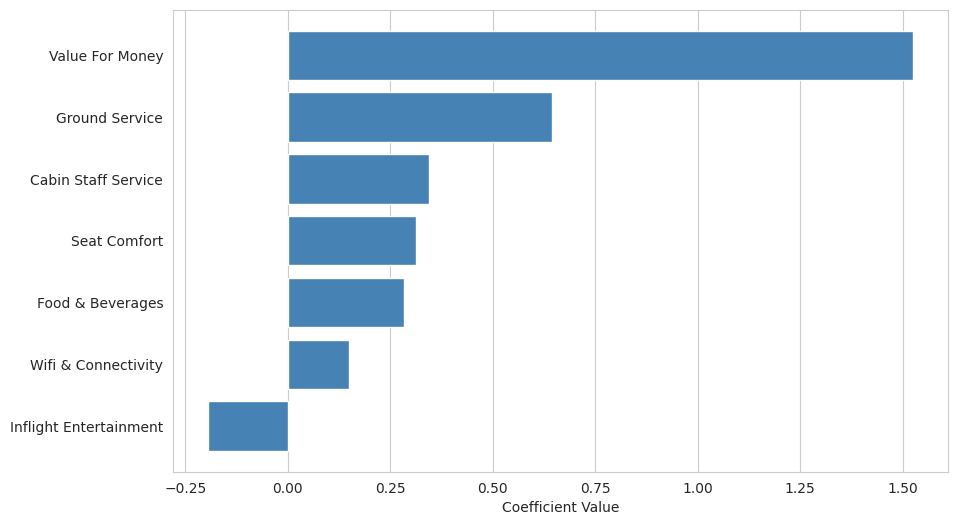

In [ ]:
# Make a logistic regression model for feature coefficients
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data = df_ratings[['Recommended', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']]

X = data.drop('Recommended', axis = 1)
Y = data['Recommended']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_coefficients = feature_coefficients.sort_values(by = 'Coefficient', ascending = True)
print(feature_coefficients)

plt.figure(figsize = (10, 6))
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.grid(axis = 'y')

plt.show()

<ipython-input-26-d7f42dd1d7b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ratings.corr(), annot = True)


<Axes: >

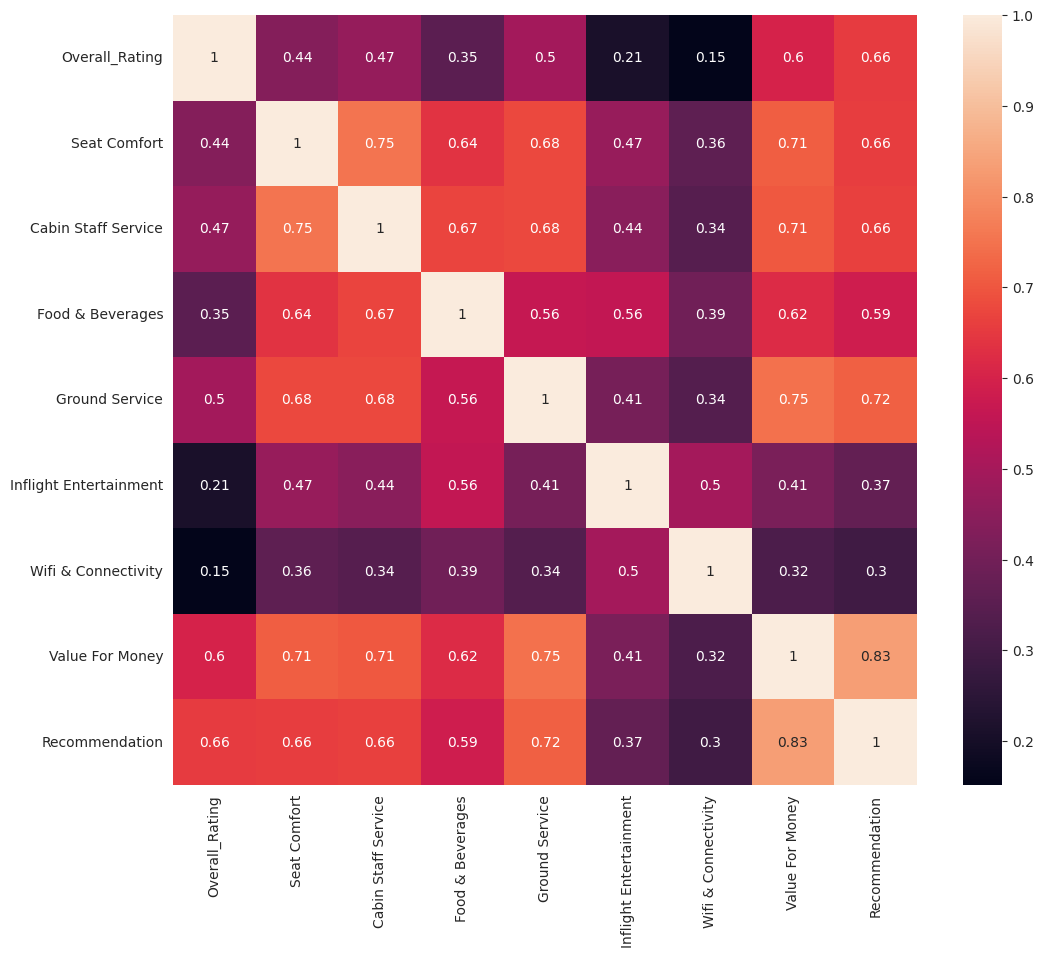

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_ratings.corr(), annot = True)

<ipython-input-27-9c9dfb9e6080>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_values = df_airlines.groupby('Airline Name').mean().reset_index()
<ipython-input-27-9c9dfb9e6080>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  overall_average_values = df_ratings.mean().to_frame(name = 'Average').T
<ipython-input-27-9c9dfb9e6080>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  overall_average_values = df_ratings.mean().to_frame(name = 'Average').T
<ipython-input

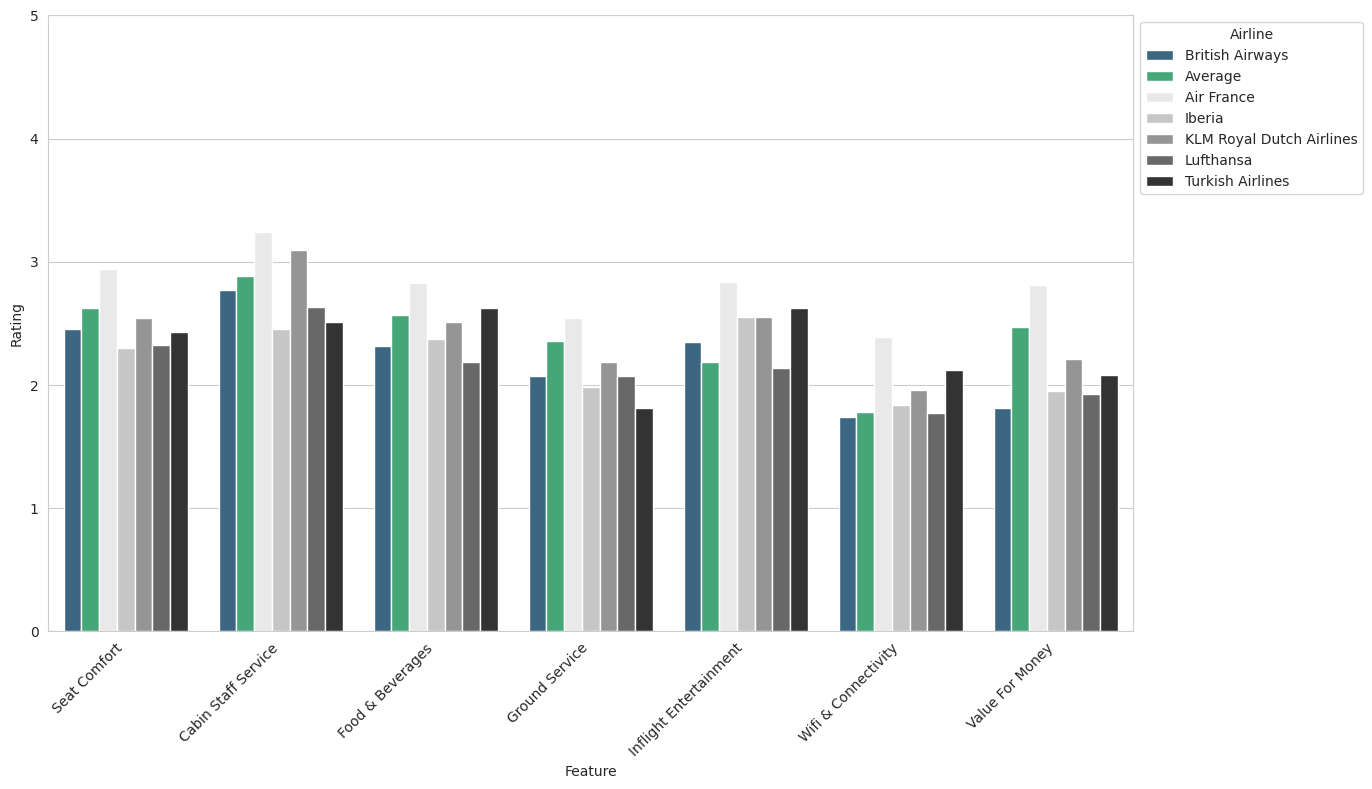

In [ ]:
 # Create a bar plot to compare features in selected airlines
airlines_to_compare = order_1
df_airlines = df_ratings[df_ratings['Airline Name'].isin(airlines_to_compare)]

average_values = df_airlines.groupby('Airline Name').mean().reset_index()

overall_average_values = df_ratings.mean().to_frame(name = 'Average').T
overall_average_values['Airline Name'] = 'Average'
df_airlines = pd.concat([df_airlines, overall_average_values])

melted_df = pd.melt(df_airlines, id_vars=['Airline Name'], value_vars=['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money'], var_name='Feature')

plt.figure(figsize=(14, 8))
palette_2 = sns.color_palette("viridis", n_colors = 2) + sns.color_palette("Greys", n_colors = len(order_1) - 2)
sns.barplot(x = 'Feature', y = 'value', hue = 'Airline Name', data = melted_df, ci = None, palette = palette_2, hue_order = order_1)

plt.xlabel('Feature')
plt.ylabel('Rating')
plt.legend(title='Airline', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(range(0, 6, 1))

plt.show()

                   Recommendation
Type Of Traveller                
Business                 0.315653
Couple Leisure           0.283951
Family Leisure           0.268612
Solo Leisure             0.364607


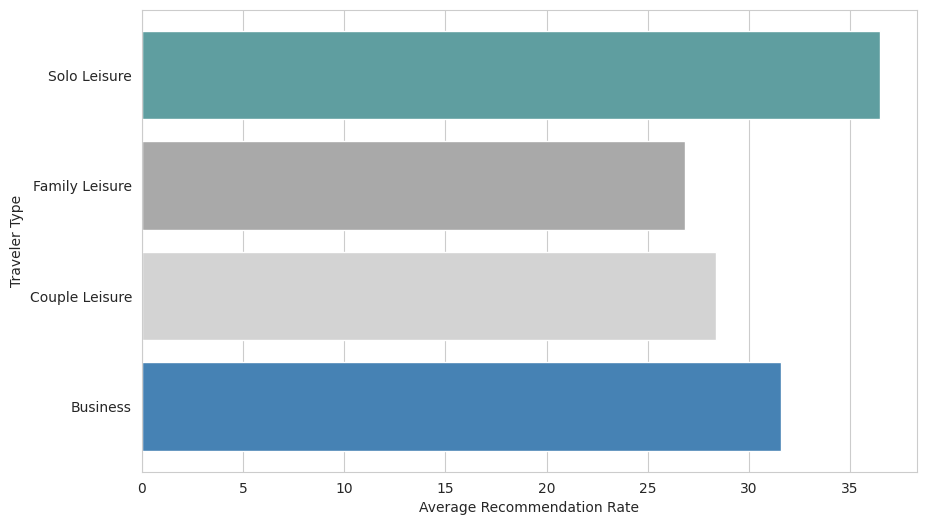

In [ ]:
# Create a bar plot for the average recommendation rate by travel type
df_ratings['Recommendation'] = df_ratings['Recommended'].map({'yes': 1, 'no': 0})

rec_pivot = df_ratings.pivot_table(index = 'Type Of Traveller', values = 'Recommendation', aggfunc=np.mean)
print(rec_pivot)

rec_pivot = rec_pivot.applymap(lambda x: x * 100)

rec = rec_pivot.reset_index()

colors = {'Solo Leisure': 'cadetblue', 'Couple Leisure': 'lightgrey', 'Family Leisure': 'darkgrey', 'Business': 'steelblue'}

plt.figure(figsize=(10, 6))
plt.barh(rec['Type Of Traveller'], rec['Recommendation'], color = [colors[type] for type in rec['Type Of Traveller']])
plt.xlabel('Average Recommendation Rate')
plt.ylabel('Traveler Type')
plt.grid(axis = 'y')

plt.show()

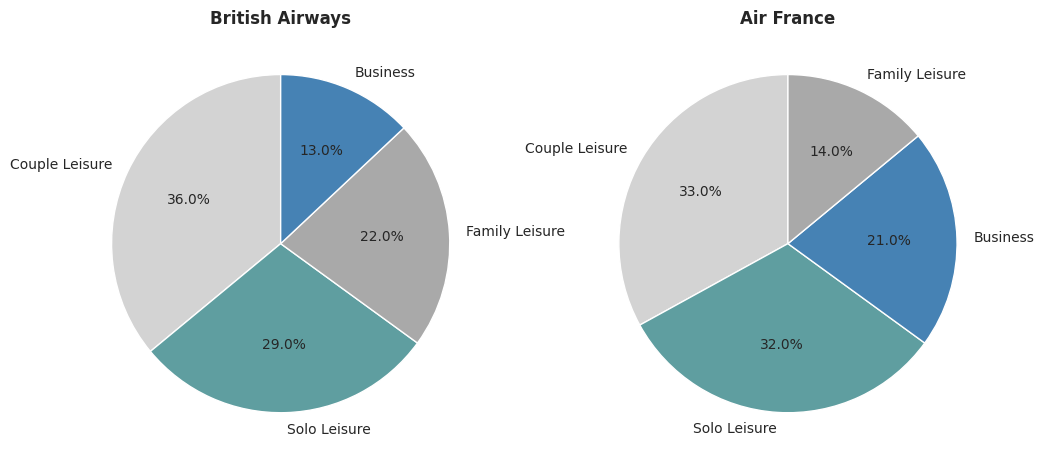

In [ ]:
# Create pie charts for travel type distribution of British Airways and Air France

df_ba = df_ratings[df_ratings['Airline Name'] == 'British Airways']
df_af = df_ratings[df_ratings['Airline Name'] == 'Air France']

traveler_ba = df_ba['Type Of Traveller'].value_counts()
traveler_af = df_af['Type Of Traveller'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(traveler_ba, labels = traveler_ba.index, autopct = '%1.1f%%', startangle = 90, colors = [colors.get(label, 'lightgray') for label in traveler_ba.index])
axs[0].set_title('British Airways', weight = 'bold')

axs[1].pie(traveler_af, labels = traveler_af.index, autopct = '%1.1f%%', startangle = 90, colors = [colors.get(label, 'lightgray') for label in traveler_af.index])
axs[1].set_title('Air France', weight = 'bold')

plt.show()

Value For Money           0.545973
Food & Beverages          0.089048
Cabin Staff Service       0.082580
Ground Service            0.082218
Inflight Entertainment    0.081546
Seat Comfort              0.072074
Wifi & Connectivity       0.046562
dtype: float64


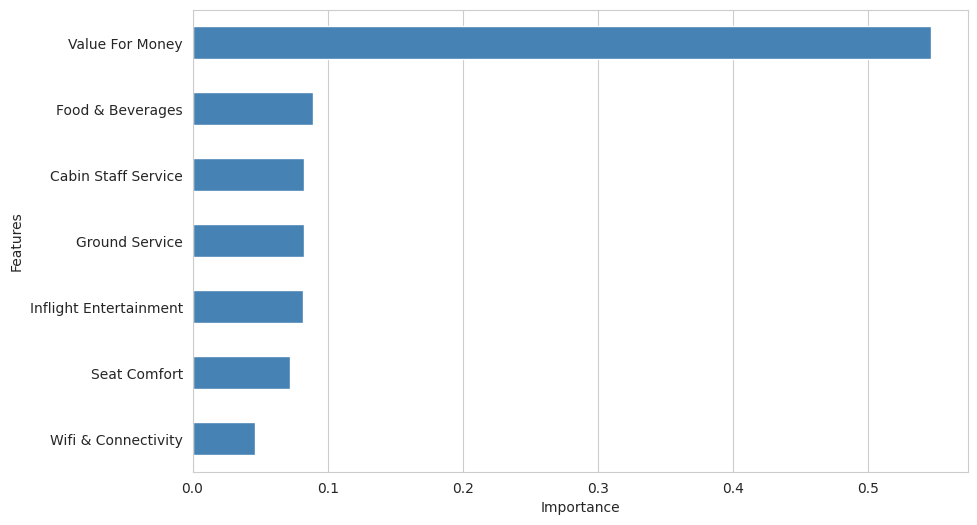

In [ ]:
# Perform random forest for feature importance in business travelers

from sklearn.ensemble import RandomForestRegressor

df_biz = df_ratings[df_ratings['Type Of Traveller'] == 'Business']

X = df_biz[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']]
Y = df_biz['Overall_Rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, Y_train)

feature_importance = pd.Series(regressor.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature_importance)

plt.figure(figsize = (10, 6))
feature_importance.sort_values().plot(kind = 'barh', color = 'steelblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis = 'y')
plt.show()